# Dempster-Shafer Theory and Its Application

### Comprehending the Concepts

Bayesian Theroy: 
- Only concerned with evidence that supports single conclusion (Eg. Evidence for each outcome)
- Bayesian theory cannot describe ignorance 
- Needs prior knowledge 

Dempster-Shafer theory:
- Concerned with evidences which support subsets of outcomes in power set
- DST is an evidence theory, it combines all the possible outcomes of a problem
- It is used to solve a problem where there may be a chance that a different evidence may lead to some different result
- It combines different evidences obtained from multiple sources


Important concepts in DST:
- Frame of discernment (Θ) -> It is the finite set of mutually exclusive hypotheses/alternatives about some problem. Or it can simply be told as a set of all states under consideration. This includes the empty set Φ as well.
- Mass value (m) -> This value is between 0 and 1 and assigned to each element of the subset. Also called the basic probability assignment, the sum of the mass values of all subsets should be equal to 1.

- Degree of belief (bel) -> This value is calcuated using the mass values of each subset, Belief of A is the sum of mass values of each component, where each component belongs to or is a subset of A

- Degree of plausibility (pl) -> This value is also calculated using the mass values, this is the sum of masses of both rigid and intersecting components. Degree of belief function and degree of plausibility function are related to each other as follows
-> Pl ( A ) = 1 − bel ( ¬ A )


Degree of belief is considered to be the lower limit and degree of plausibility is considered to be the upper limit of the probability interval. 

Below always stays true:
<br>
**Mass of A <= Belief of A <= Plausibility of A**

In [91]:
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv
import matplotlib

from pyds import MassFunction, powerset

### DST Example problem 

- 4 people named Brad, Jack, Sam and Kevin (B,J,S,K) are locked in a room
- Light goes off!
- When the lights are back on, K is found to be dead, stabbed with a knife
- It is not a suicide and he is stabbed in the back
- It is confirmed that, no one entered the room
- There is only one killer 
- The set can {B,J,S}
- Frame of discernment (power set) Θ = {null set, {B}, {J}, {S}, {B,J}, {B,S}, {J,S}, {B,J,S}

In [47]:
# A detective has provided mass values for all the elements of the power set, based on his domain experience
# and after reviewing the crime scene
masses_for_suspects = MassFunction({'B':0.1, 'J':0.2, 'S':0.1, 'BJ':0.1, 'BS':0.1,
                                    'JS':0.3, 'BJS':0.1})

# Printing the masses given for each component in the power set
print("Masses for suspects:",masses_for_suspects)
print()

print("Checking the working of pyds module: ")
# Checking bpa, bel, pl value of a random element in the power set
print("Basic probability assignment or mass assigned to {'B','J'}=>", masses_for_suspects['BJ'])
print("Belief of {'B','J'}=>", masses_for_suspects.bel('BJ'))
print("Plausibility of {'B','J'}=>", masses_for_suspects.pl('BJ'))

Masses for suspects: {{'S', 'J'}:0.3; {'J'}:0.2; {'S', 'J', 'B'}:0.1; {'S'}:0.1; {'J', 'B'}:0.1; {'S', 'B'}:0.1; {'B'}:0.1}

Checking the working of pyds module: 
Basic probability assignment or mass assigned to {'B','J'}=> 0.1
Belief of {'B','J'}=> 0.4
Plausibility of {'B','J'}=> 0.9


In [48]:
# Creating empty lists for storing belief and plausibility values
bel_list = []
pl_list = []

# Iterating through the masses_for_suspects to compute all bel and pl values for each component
for i in masses_for_suspects:
    bel_list.append(masses_for_suspects.bel(i))
    pl_list.append(masses_for_suspects.pl(i))

In [49]:
# Creating a dictinary to create a dataframe
dictionary_of_suspects_masses = {'{Brad}':0.1, '{Jack}':0.2, '{Sam}':0.1, '{Brand,Jack}':0.1, '{Brad,Sam}':0.1,
                                    '{Sam,Jack}':0.3, '{Brad,Jack,Sam}':0.1}

# Key value pairs as dictionary of items
d_items = dictionary_of_suspects_masses.items()

# Creating a dataframes for each type of value
suspects_df = pd.DataFrame(d_items, columns = ['suspects', 'mass_values'])
bel_df = pd.DataFrame(bel_list, columns = ["belief_values"]) 
pl_df = pd.DataFrame(pl_list, columns =["plausibility_values"])

# Concatinating above dataframes 
pd.concat([suspects_df, bel_df, pl_df], axis=1)

,suspects,mass_values,belief_values,plausibility_values
0,{Brad},0.1,0.1,0.4
1,{Jack},0.2,0.2,0.7
2,{Sam},0.1,0.1,0.6
3,"{Brand,Jack}",0.1,0.4,0.9
4,"{Brad,Sam}",0.1,0.3,0.8
5,"{Sam,Jack}",0.3,0.6,0.9
6,"{Brad,Jack,Sam}",0.1,1.0,1.0


**Observation:** From the above dataframe we can see that the mass values, belief values and plausibility values are added computed using the pyds module. 

**Inferences:**
The lower and upper bounds for each suspect is shown the dataframe and this tell that the probability of any A cannot go below the belief values. Plausibility_values represents the maximum share of evidences we could possibily have, if for all sets that intersect with A. The part that intersects is actually valid. So pl(A) is the maximum possible value. This belief interval allows us to reason about the degree of certainity or uncertainity of our beliefs. 
<br>
- A small difference between the bl and pl values shows that we are certain about our belief.
- A large difference shows that we are uncertain about our belief.

## Applying DST on IRIS dataset for classification

Goal: The main idea of this project is to use Dempster-Shafer theory to classify the species of the IRIS Dataset and compare its performance with other commanly used ML techniques for classification

In [50]:
data_file = r'/Users/praveen/Desktop/DST/Iris.csv'
df = pd.read_csv(data_file).dropna()
print('data shape:', df.shape)
df.sample(10)

data shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
32,33,5.2,4.1,1.5,0.1,Iris-setosa
126,127,6.2,2.8,4.8,1.8,Iris-virginica
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
13,14,4.3,3.0,1.1,0.1,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa
123,124,6.3,2.7,4.9,1.8,Iris-virginica
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [51]:
df.rename(columns={"Species": "Class"}, inplace = True)

### Steps followed for using DST as classifier

- Frame of discernment or power set is created
- Mass values are assigned to every attribute -> sepal length & width, petal length & width
- Dempster Shafer combination is applied 
- Hypothesis with highest mass value is selected
- If that hypothesis contains one category, this category is returned
- If there is an overlap, then Feature selection value is calculated for all
- The attribute that has the min. FSV is selected
- Difference for selected attributes are calculated
- The smallest absoulte differenes are calculated for each category
- The category with smallest differences are returned

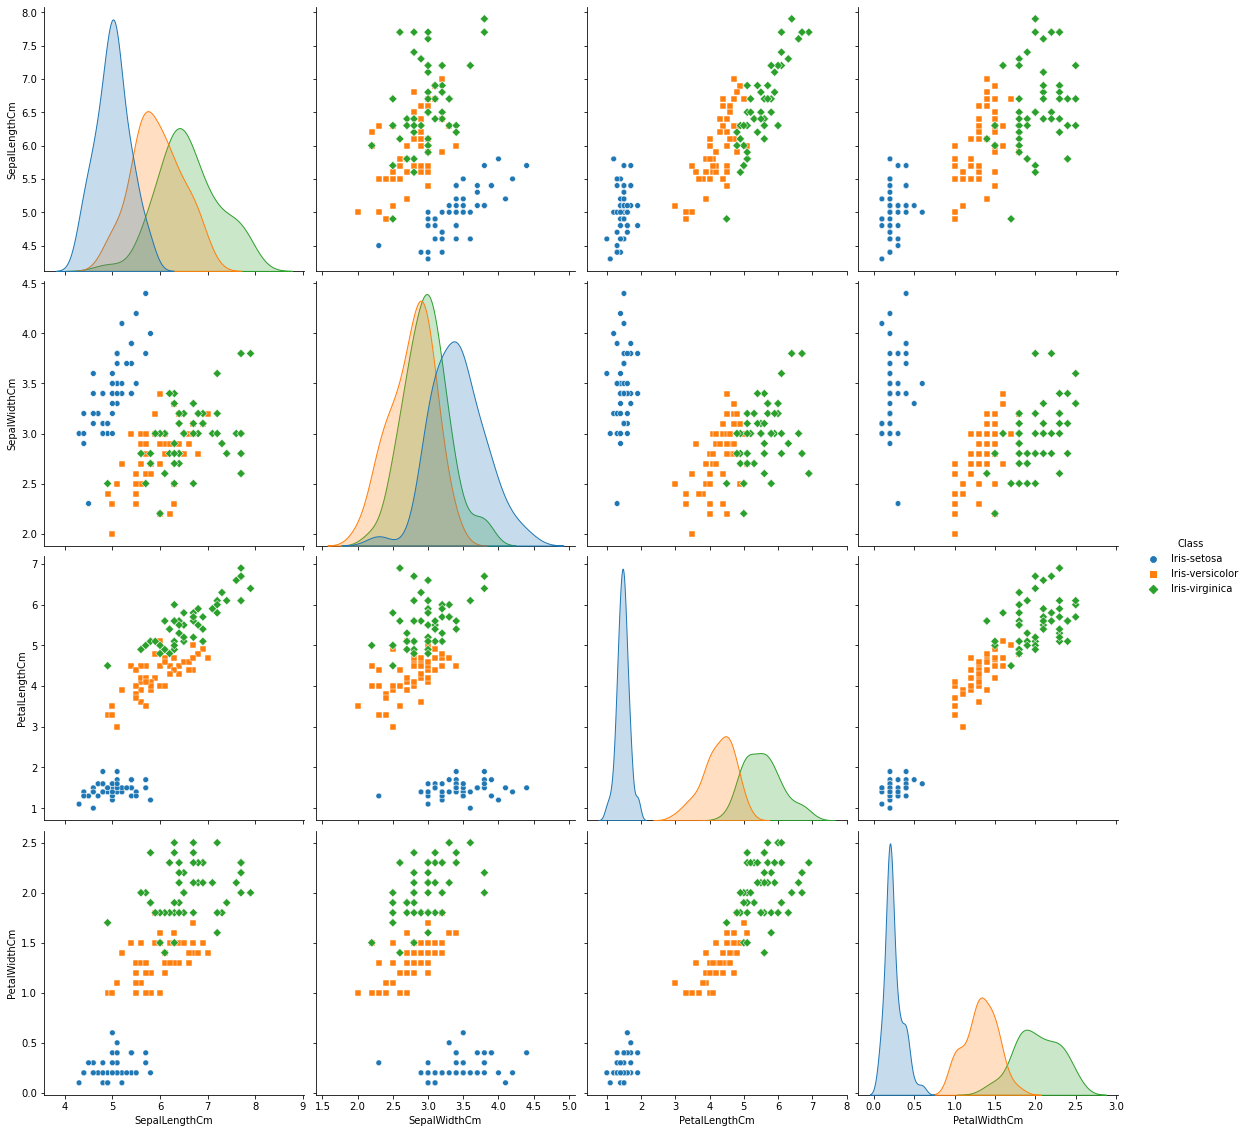

In [52]:
# Visualizing Iris dataframe
sns.pairplot(df.drop(['Id'],axis=1), hue='Class', height=4, markers = ["8","s","D"])
# Showing the plot
plt.show()

**Observation:** From the above pair plots, we can observe that Iris-Setosa is found to be distinct because of its PetalLength and/or PetalWidth attributes.

In [53]:
# Firstly, we need to find the maximum and minimum values for each class based on one 
# feature of the training data. Then we calculate the overlapping part for the three classes, 
# to obtain the boundary information for each class

# Fields contains the attributes 
fields = df.columns[1:4]

# For each species, the attributes min and max lengths/wdiths are found using iteration 
classRange = {}
for c in df.Class.unique():
    fieldRange = {}
    for f in fields: # # Iterating through the attributes (sepal and petal lengths and widths)
        fieldRange[f] =(df[df.Class == c][f].min(), df[df.Class == c][f].max())
    classRange[c] = fieldRange

    
# Printing the min and max values for each category
for i in df.Class.unique():
    print(i)
    print(classRange[i])

Iris-setosa
{'SepalLengthCm': (4.3, 5.8), 'SepalWidthCm': (2.3, 4.4), 'PetalLengthCm': (1.0, 1.9)}
Iris-versicolor
{'SepalLengthCm': (4.9, 7.0), 'SepalWidthCm': (2.0, 3.4), 'PetalLengthCm': (3.0, 5.1)}
Iris-virginica
{'SepalLengthCm': (4.9, 7.9), 'SepalWidthCm': (2.2, 3.8), 'PetalLengthCm': (4.5, 6.9)}


**Observation:** From the above, we can see that the minimum and maximum values for each attribute is obtained for every category

### Attempt to assign Masses to each subset

In [54]:
# Power Set or frame of discernment
power_set = dict.fromkeys(powerset(df["Class"].unique()), 0)

# Iterating for printing one by one
for i in power_set:
    print(i)

frozenset()
frozenset({'Iris-setosa'})
frozenset({'Iris-versicolor'})
frozenset({'Iris-virginica'})
frozenset({'Iris-versicolor', 'Iris-setosa'})
frozenset({'Iris-setosa', 'Iris-virginica'})
frozenset({'Iris-versicolor', 'Iris-virginica'})
frozenset({'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'})


**Observation:** The above powerset contains every category as singleton set i:e set with only one member and other subsets with other species. This power set also contains the empty set which is the first element. This is because the power set must contain all **possible** subsets of the set. The frozenset() is an inbuilt function in Python which takes an iterable object as input and makes them immutable. The elements cannot be changed at any point of time. -> Frame of discernment is created.

In [57]:
# First attempt in assigning masses to the each component of the power set 
m = {}
# Iterating through the 
for f in fields:
    # MassFunction() method is used on the power set to compute the mass values and the values are normalized 
    # inorder to bring the sum to 1
    m[f] = MassFunction(power_set).normalize
    # Prints mass value of each element of the component
    print(f, 'MassFunction =', m[f])
    print()

SepalLengthCm MassFunction = <bound method MassFunction.normalize of {frozenset(): 0.0, frozenset({'Iris-setosa'}): 0.0, frozenset({'Iris-versicolor'}): 0.0, frozenset({'Iris-virginica'}): 0.0, frozenset({'Iris-versicolor', 'Iris-setosa'}): 0.0, frozenset({'Iris-setosa', 'Iris-virginica'}): 0.0, frozenset({'Iris-versicolor', 'Iris-virginica'}): 0.0, frozenset({'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'}): 0.0}>

SepalWidthCm MassFunction = <bound method MassFunction.normalize of {frozenset(): 0.0, frozenset({'Iris-setosa'}): 0.0, frozenset({'Iris-versicolor'}): 0.0, frozenset({'Iris-virginica'}): 0.0, frozenset({'Iris-versicolor', 'Iris-setosa'}): 0.0, frozenset({'Iris-setosa', 'Iris-virginica'}): 0.0, frozenset({'Iris-versicolor', 'Iris-virginica'}): 0.0, frozenset({'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'}): 0.0}>

PetalLengthCm MassFunction = <bound method MassFunction.normalize of {frozenset(): 0.0, frozenset({'Iris-setosa'}): 0.0, frozenset({'Iris-versicolor'}): 

**Observation:** The above mass values are calculated without considering the grouping of the data properly. Some items may not be classified into a single class. For example, if an attribute value is less than min(class 2), and greater than or equal to min(class 1), the data item must belong to class 1. However, if the value is less than min(class 3), and greater than or equal to min(class 2), the data item could belong to either class 1 or class 2. 

In [58]:
def hypothesis(df, classRange, fieldName, value):
    hset = set()
    for c in df.Class.unique():
        if (classRange[c][fieldName][0] <= value and value < classRange[c][fieldName][1]):
            hset.add(c)
    return frozenset(hset)

def hypothesisCounts(hypothesisCount, h, singletons, frame):
    if h in singletons:
        hypothesisCount[h] += 0.9
        hypothesisCount[frame] += 0.1
    elif h == frame:
        hypothesisCount[frame] += 1.0
    else:
        hypothesisCount[h] += 0.9
        hypothesisCount[frame] += 0.1

In [64]:
hypothesisCount = dict.fromkeys(powerset(df.Class.unique()), 0)

for i in hypothesisCount:
    print(i)

frozenset()
frozenset({'Iris-setosa'})
frozenset({'Iris-versicolor'})
frozenset({'Iris-virginica'})
frozenset({'Iris-versicolor', 'Iris-setosa'})
frozenset({'Iris-setosa', 'Iris-virginica'})
frozenset({'Iris-versicolor', 'Iris-virginica'})
frozenset({'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'})


**Observation:** The above powerset contains every category as singleton set i:e set with only one member and other subsets with other species. This power set also contains the empty set which is the first element. This is because the power set must contain all **possible** subsets of the set. The frozenset() is an inbuilt function in Python which takes an iterable object as input and makes them immutable. The elements cannot be changed at any point of time. -> Frame of discernment is created.

In [90]:
# Singletons
singletons = MassFunction(hypothesisCount).singletons()

# Iterating over the singletons
for i in singletons:
    print(i)

frozenset({'Iris-virginica'})
frozenset({'Iris-setosa'})
frozenset({'Iris-versicolor'})


In [89]:
# Printing the frozen set
frame = frozenset(df.Class.unique())

print(frame)

frozenset({'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'})


In [72]:
m = {}
for f in fields:
    hypothesisCount = dict.fromkeys(powerset(df.Class.unique()), 0)
    for index, row in df.iterrows():
        h = hypothesis(df, classRange, f, row[f])
        hypothesisCounts(hypothesisCount, h, singletons, frame)
    m[f] = MassFunction(hypothesisCount).normalize()
    print(f, 'MassFunction =', m[f])
    print()

SepalLengthCm MassFunction = {{'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'}:0.4446680080482897; {'Iris-versicolor', 'Iris-virginica'}:0.3863179074446678; {'Iris-setosa'}:0.0965794768611671; {'Iris-virginica'}:0.07243460764587531; {'Iris-versicolor', 'Iris-setosa'}:0.0; {'Iris-versicolor'}:0.0; {'Iris-setosa', 'Iris-virginica'}:0.0}

SepalWidthCm MassFunction = {{'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'}:0.7645875251509054; {'Iris-setosa', 'Iris-virginica'}:0.1448692152917505; {'Iris-setosa'}:0.06639839034205235; {'Iris-versicolor', 'Iris-virginica'}:0.018108651911468817; {'Iris-versicolor'}:0.006036217303822939; {'Iris-virginica'}:0.0; {'Iris-versicolor', 'Iris-setosa'}:0.0}

PetalLengthCm MassFunction = {{'Iris-setosa'}:0.29327902240325865; {'Iris-virginica'}:0.25050916496945014; {'Iris-versicolor', 'Iris-virginica'}:0.1771894093686355; {'Iris-versicolor'}:0.1771894093686355; {'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'}:0.10183299389002021; {'Iris-versicolor',

**Observation:** Above are the mass values for each sub set in the power set. 

### Dempster Rule of Combination

DRC is concerned with uniting two independent sets of mass functions on a frame of discernment Θ, for example m1 and m2. In this case, the combined mass function of m1 and m2 (the joint mass) would be expressed as m1,2 where:

m1,2(A)=(m1 ⊕ m2)(A)
and,

(m 1 ⊕ m 2 )( A ) = 1 ∑ m 1 ( B ) m 2 ( C ), 1−KB∩C=A≠φ
where K, a measure of the conflict between the two mass sets, is given by:

 K = ∑m1(B)m2(C), K ≠1. (12) B∩C=φ
 
A normalization factor (1-K) is used to ignore the conflicting evidences and also the agreement between the multiple sources of information is confimred by this normalization factor.

An example for understanding the DRC calculation: 
Mass values in teh set M1a are,  m1(n) = 0.4, and m1(a) = 0.6, and the mass values in the set M2 are m2(n) = 0.2, and m2(a) = 0.8, where n represents the hypothesis normal and a represents the hypothesis abnormal. First, K is calculated by multiplying those masses for which the intersect is the empty set, and summing the results:

K=(m(n)×m (a))+(m(a)×m (n))
=(0.4×0.8)+(0.6×0.2) = 0.44 => 44/100

1-(44/100) = 0.56 = > 56/100 (Normalization factor)

The induvidual masses are multiplied and for which the intersect is the proposition of interest, summing them up.
Then this is multiplied by the the resiprocal of the Normalization factor

(m1 ⊕ m2)(n) = {1/(1-K)} * (m1(n) * m2(n)) => {100/56} * (0.4 * 0.2) = 1/7
(m1 ⊕ m2)(a) = {1/(1-K)} * (m1(a) * m2(a)) => {100/56} * (0.6 * 0.8) = 6/7
<br>
<br>
Mass values of all 4 attributes are combined using above discussed DRC. This gives us the overall mass values for all hypothesis. The hypothesis with the biggest belief value is used to classify the data item. 

### Theory about Feature Selection and steps after that:

Suitable features must be selected in order to separate two or three classes using the difference between the data item value and the mean value of the three classes. A feature is required with the following characteristics: the data feature values of one single class are close together; and the values of two classes viewed as a group are far apart. This is achieved by calculating the standard deviation for the two classes, and the standard deviation for the union of these two classes. This is defined as the Feature Selection Value

<IMG>
    
For example, to separate the class Setosa and the class Versicolour, we select the feature with the smallest value
    
In the second step, a suitable feature is selected and the bpa function B is used to assign mass values. We build bpa function B based on the information of the absolute distances (defined as difference in Equation 8) between the data item value of the chosen feature and the mean feature value of each class. Here, we want to classify the data item as the class with the smallest difference.

In [80]:
# It provides functions for working with other functions and callable objects to use
# or extend them without completely rewriting them
import functools

# We create functions for the above mentioned puposes:
# Function to find the min fsv 
def min_fsv_attr(sdf, fields):
    fsv = {}
    for f in fields:
        l = list(sdf.loc[:, f]['std'])
        fsv[f] = functools.reduce(lambda a,b: a*b, l) / df[f].std()
    return min(fsv.keys(), key=(lambda k: fsv[k]))

# Function to return the feature with minimum fsv
# Absolute difference a (distance) between the data item’s a value and the mean a 
# value is calculated for each class
def min_dist_attr(sdf, fsv_attr, candidates, sample):
    dist = {}
    for c in candidates:
        dist[c] = abs(sample[fsv_attr] - sdf.loc[c, fsv_attr]['mean'])
    return min(dist.keys(), key=(lambda k: dist[k]))

In [79]:
# Storing the standard deviations of each class for each attribute
sdf = df.groupby('Class').describe()

# Using the function to find the minimum feature selection value 
fsv_attr = min_fsv_attr(sdf, fields) 

# The feature with the smallest FSV is chosen as the suitable feature
print("Feature selected based on FSV: ",fsv_attr)

Feature selected based on FSV:  PetalLengthCm


In [84]:
def predict(df, combine):
    best = 0.0
    bestClass = frozenset({})
    for c in combine.all():
        if (combine[c] > best):
            best = combine[c]
            bestClass = c
    return (bestClass, best)

In [87]:
# To keep count of fails an predictions 
countFail = 0
countPredict = 0
# Mass values stored in dictionary 
ms = {}

# Iterating through the dataframe's index and rows
for index, row in df.iterrows():
    sample = row
    for f in fields:
        hypothesisCount = dict.fromkeys(powerset(df.Class.unique()), 0)
        h = hypothesis(df, classRange, f, sample[f])
        hypothesisCounts(hypothesisCount, h, singletons, frame)   
        ms[f] = MassFunction(hypothesisCount).normalize()
        
    # Combining mass values
    combine_mf = functools.reduce(lambda a,b: a & b, ms.values())
    
    # Predicted values are stored 
    (bestClass, best) = predict(df, combine_mf)
    if (bestClass in singletons) and (best > 0.8):
        # If the class is singleton and its confidence is greater than 80%
        # Increments the count
        countPredict += 1
        # Condition to check the failure
        if bestClass != frozenset({sample.Class}):
            # print('failed predict:', set(bestClass), best, 'expect:', set({sample.Class}))
            countFail +=1
    else:
        # Not a singleton class, find by second step strategy
        fsvClass = min_dist_attr(sdf, fsv_attr, list(bestClass), sample)
        if (best > 0.8):
            countPredict += 1
            if fsvClass != sample.Class:
                # Incrementing the failure count
                countFail +=1
    
print('Total rows', df.Class.count())
print('Total predicted: ', countPredict)
print('Total fail predicted: ', countFail)
print('Accuracy: ', (countPredict - countFail)/(countPredict*1.0))

Total rows 150
Total predicted:  149
Total fail predicted:  10
Accuracy:  0.9328859060402684


The accuracy of classification from DST is 93.2% which is doing a good job when compared to the other Machine Learning models. This statitical appraoch is capable of performing classification with certianities.